In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use("fivethirtyeight")
%matplotlib inline
pd.set_option('display.max_columns',30)

In [2]:
df=pd.read_csv('us_perm_visas.csv')
df.head()
df.shape

(374362, 154)

In [3]:
df.columns

Index(['add_these_pw_job_title_9089', 'agent_city', 'agent_firm_name',
       'agent_state', 'application_type', 'case_no', 'case_number',
       'case_received_date', 'case_status', 'class_of_admission',
       ...
       'ri_pvt_employment_firm_to', 'ri_us_workers_considered',
       'schd_a_sheepherder', 'us_economic_sector', 'wage_offer_from_9089',
       'wage_offer_to_9089', 'wage_offer_unit_of_pay_9089',
       'wage_offered_from_9089', 'wage_offered_to_9089',
       'wage_offered_unit_of_pay_9089'],
      dtype='object', length=154)

In [4]:
df.isnull().sum()

add_these_pw_job_title_9089      332168
agent_city                       162908
agent_firm_name                  167365
agent_state                      166123
application_type                 239093
                                  ...  
wage_offer_to_9089               300728
wage_offer_unit_of_pay_9089      115916
wage_offered_from_9089           259715
wage_offered_to_9089             343347
wage_offered_unit_of_pay_9089    303663
Length: 154, dtype: int64

In [5]:
df.dtypes

add_these_pw_job_title_9089       object
agent_city                        object
agent_firm_name                   object
agent_state                       object
application_type                  object
                                  ...   
wage_offer_to_9089                object
wage_offer_unit_of_pay_9089       object
wage_offered_from_9089           float64
wage_offered_to_9089             float64
wage_offered_unit_of_pay_9089     object
Length: 154, dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374362 entries, 0 to 374361
Columns: 154 entries, add_these_pw_job_title_9089 to wage_offered_unit_of_pay_9089
dtypes: float64(10), object(144)
memory usage: 439.8+ MB


In [7]:
df.describe()

,employer_num_employees,employer_yr_estab,foreign_worker_yr_rel_edu_completed,fw_info_yr_rel_edu_completed,job_info_alt_cmb_ed_oth_yrs,job_info_alt_occ_num_months,job_info_experience_num_months,job_info_training_num_months,wage_offered_from_9089,wage_offered_to_9089
count,2.390130e+05,238958.000000,83364.000000,137198.000000,70220.000000,147200.000000,133188.000000,4779.000000,1.146470e+05,3.101500e+04
mean,2.309387e+04,1984.208267,2001.345761,2002.633603,4.593876,36.483118,33.103560,32.685081,9.588846e+04,1.232273e+05
std,5.453129e+05,38.470555,91.444715,89.674423,4.838582,23.391668,22.733393,20.593288,1.463822e+05,1.080289e+05
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.700000e+00,0.000000e+00
25%,7.300000e+01,1980.000000,2003.000000,2004.000000,3.000000,24.000000,12.000000,12.000000,7.453400e+04,9.700100e+04
50%,1.200000e+03,1996.000000,2006.000000,2007.000000,5.000000,24.000000,24.000000,36.000000,9.064400e+04,1.206000e+05
75%,1.613400e+04,2004.000000,2010.000000,2011.000000,5.000000,60.000000,60.000000,36.000000,1.100000e+05,1.448419e+05
max,2.635506e+08,2016.000000,2103.000000,2207.000000,96.000000,240.000000,244.000000,240.000000,1.629060e+07,1.328500e+07


In [8]:
df.columns.values

array(['add_these_pw_job_title_9089', 'agent_city', 'agent_firm_name',
       'agent_state', 'application_type', 'case_no', 'case_number',
       'case_received_date', 'case_status', 'class_of_admission',
       'country_of_citizenship', 'country_of_citzenship', 'decision_date',
       'employer_address_1', 'employer_address_2', 'employer_city',
       'employer_country', 'employer_decl_info_title', 'employer_name',
       'employer_num_employees', 'employer_phone', 'employer_phone_ext',
       'employer_postal_code', 'employer_state', 'employer_yr_estab',
       'foreign_worker_info_alt_edu_experience',
       'foreign_worker_info_birth_country', 'foreign_worker_info_city',
       'foreign_worker_info_education',
       'foreign_worker_info_education_other', 'foreign_worker_info_inst',
       'foreign_worker_info_major', 'foreign_worker_info_postal_code',
       'foreign_worker_info_rel_occup_exp',
       'foreign_worker_info_req_experience', 'foreign_worker_info_state',
       'forei

In [9]:
df['case_no']

0         A-07323-97014
1         A-07332-99439
2         A-07333-99643
3         A-07339-01930
4         A-07345-03565
              ...      
374357              NaN
374358              NaN
374359              NaN
374360              NaN
374361              NaN
Name: case_no, Length: 374362, dtype: object

In [10]:
df['case_number']

0                   NaN
1                   NaN
2                   NaN
3                   NaN
4                   NaN
              ...      
374357    A-16363-85407
374358    A-16271-56745
374359    A-16354-82345
374360    A-16357-84250
374361    A-16279-59292
Name: case_number, Length: 374362, dtype: object

In [11]:
df.drop('case_no',axis=1,inplace=True)

In [12]:
df.columns

Index(['add_these_pw_job_title_9089', 'agent_city', 'agent_firm_name',
       'agent_state', 'application_type', 'case_number', 'case_received_date',
       'case_status', 'class_of_admission', 'country_of_citizenship',
       ...
       'ri_pvt_employment_firm_to', 'ri_us_workers_considered',
       'schd_a_sheepherder', 'us_economic_sector', 'wage_offer_from_9089',
       'wage_offer_to_9089', 'wage_offer_unit_of_pay_9089',
       'wage_offered_from_9089', 'wage_offered_to_9089',
       'wage_offered_unit_of_pay_9089'],
      dtype='object', length=153)

In [13]:
df['case_status']

0         Certified
1            Denied
2         Certified
3         Certified
4         Certified
            ...    
374357    Withdrawn
374358    Withdrawn
374359    Withdrawn
374360    Withdrawn
374361    Withdrawn
Name: case_status, Length: 374362, dtype: object

In [14]:
df=df[df['case_status']!='Withdrawn']
#no point in keeping withdrawn in col

In [15]:
df.case_status

0         Certified
1            Denied
2         Certified
3         Certified
4         Certified
            ...    
374349    Certified
374350    Certified
374351    Certified
374352    Certified
374353    Certified
Name: case_status, Length: 356168, dtype: object

In [16]:
df.case_status.unique()

array(['Certified', 'Denied', 'Certified-Expired'], dtype=object)

In [17]:
df.loc[df.case_status=='Certified-Expired','case_status']='Certified'

In [18]:
df.case_status.unique()

array(['Certified', 'Denied'], dtype=object)

In [20]:
df.case_status.value_counts(normalize=True)

case_status
Certified    0.927986
Denied       0.072014
Name: proportion, dtype: float64

In [21]:
df.dropna(axis=1,how='all',inplace=True)
df.dropna(axis=0,how='all',inplace=True)

In [22]:
df.shape

(356168, 153)

In [23]:
df.columns

Index(['add_these_pw_job_title_9089', 'agent_city', 'agent_firm_name',
       'agent_state', 'application_type', 'case_number', 'case_received_date',
       'case_status', 'class_of_admission', 'country_of_citizenship',
       ...
       'ri_pvt_employment_firm_to', 'ri_us_workers_considered',
       'schd_a_sheepherder', 'us_economic_sector', 'wage_offer_from_9089',
       'wage_offer_to_9089', 'wage_offer_unit_of_pay_9089',
       'wage_offered_from_9089', 'wage_offered_to_9089',
       'wage_offered_unit_of_pay_9089'],
      dtype='object', length=153)

In [24]:
df.application_type

0         PERM
1         PERM
2         PERM
3         PERM
4         PERM
          ... 
374349     NaN
374350     NaN
374351     NaN
374352     NaN
374353     NaN
Name: application_type, Length: 356168, dtype: object

<Axes: xlabel='application_type'>

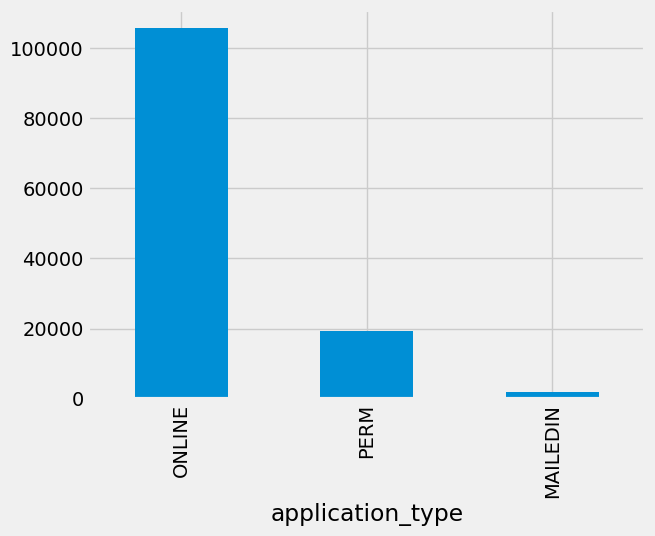

In [25]:
df['application_type'].value_counts().plot(kind='bar')

#insights=most people applied visa online

<Axes: xlabel='application_type', ylabel='count'>

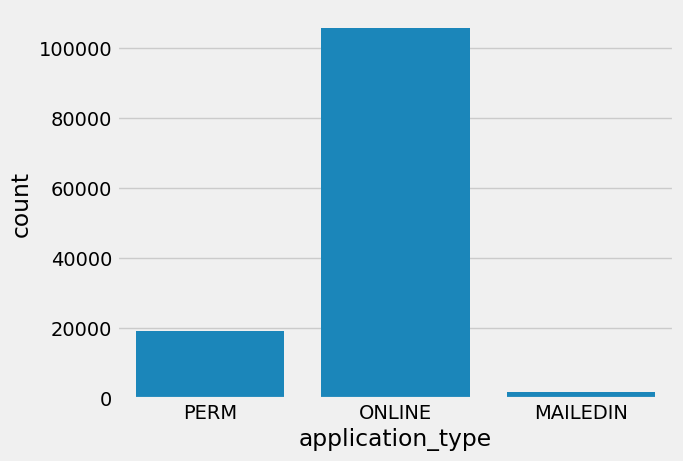

In [26]:
sns.countplot(data=df,x='application_type')

In [28]:
df.us_economic_sector

0                            IT
1         Other Economic Sector
2                     Aerospace
3         Other Economic Sector
4                  Advanced Mfg
                  ...          
374349                      NaN
374350                      NaN
374351                      NaN
374352                      NaN
374353                      NaN
Name: us_economic_sector, Length: 356168, dtype: object

In [29]:
economic_Sector=df['us_economic_sector'].value_counts()

In [36]:
economic_Sector

us_economic_sector
IT                       49311
Advanced Mfg             17601
Other Economic Sector    14662
Finance                   8686
Educational Services      8561
Health Care               6407
Retail                    4208
Aerospace                 3917
Hospitality               1767
Construction              1315
Automotive                1084
Energy                    1021
Transportation             893
Agribusiness               784
Biotechnology              436
Geospatial                 137
Homeland Security           78
Name: count, dtype: int64

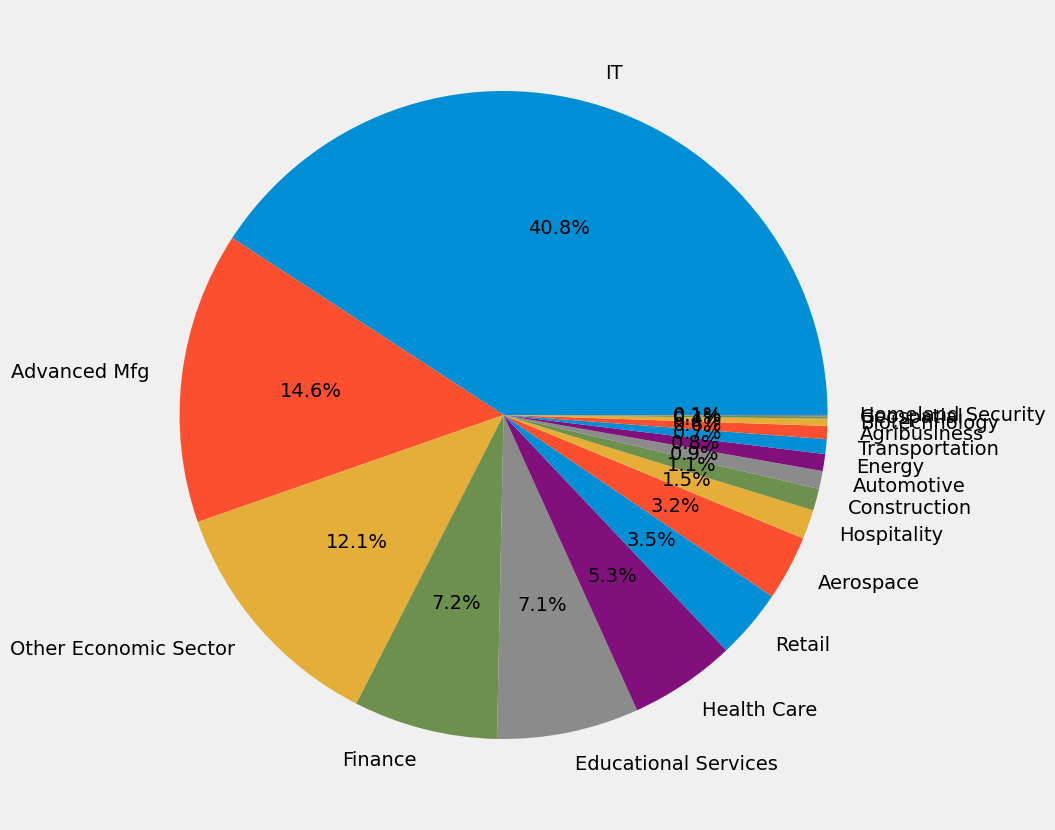

In [37]:
plt.figure(figsize=(20,10))
plt.pie(economic_Sector,labels=economic_Sector.index,autopct='%1.1f%%')
plt.show()

In [38]:
df['decision_date']=pd.to_datetime(df['decision_date'])
df['year']=df['decision_date'].dt.year

In [39]:
df['year']

0         2012
1         2011
2         2011
3         2011
4         2012
          ... 
374349    2016
374350    2016
374351    2016
374352    2016
374353    2016
Name: year, Length: 356168, dtype: int32

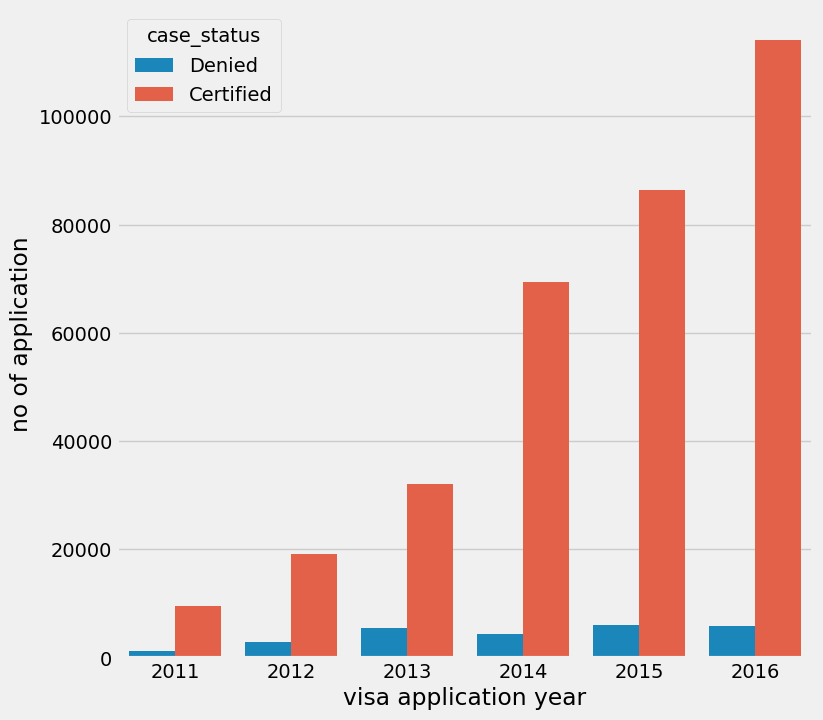

In [40]:

fig,ax=plt.subplots(figsize=(8,8))
sns.countplot(x='year',hue='case_status',data=df)
ax.set(xlabel='visa application year',ylabel='no of application')
plt.show()

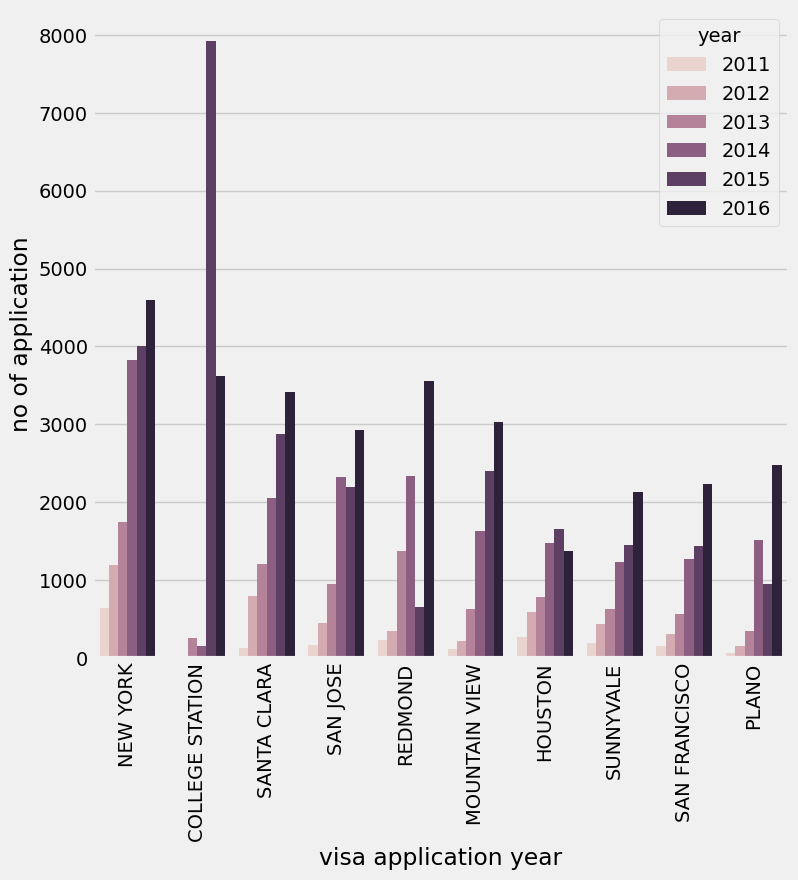

In [45]:

fig,ax=plt.subplots(figsize=(8,8))
sns.countplot(x='employer_city',hue='year',data=df,order=df.employer_city.value_counts().iloc[:10].index)
ax.set(xlabel='visa application year',ylabel='no of application')
plt.xticks(rotation=90)
plt.show()